# Homework 4

# Part I

### 1. 

In order to proceed you need Microsoft Excel and file "https://www.dropbox.com/s/5qituivg6ovlscr/Homework2b.xlsx?dl=1". 

This file contains data for 10 value-weighted industry portfolios, using monthly returns over an 90-year period.  



Find the minimum variance and tangency portfolios of the industries. 

(hint 1:  For the tangency portfolio, put everything in excess return space and use the formula we derived in class) 


(hint 2::  to find the minimum variance portfolio, look at the maximization problem of Lecture 3 and now replace the constraint that the portfolio has to have some target expected return, by the constraint that the weights have to add up to 1-- The constraint becomes 1'@ W-1 instead of ER' @ W -mutarget , so in practice you are simply replacing the vector of average returns by a vector of 1's...What does this mean? It means that a small adjustement to the formula you use to construct the tangent portfolio will deliver for you the minimum variance portfolio.



Report their weights. Don't forget to normalize so they add up to 1, and be careful so the signs don't flip! 

Comment on the different weights applied to each industry under the MVP and Tangent portfolios



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display_html

df = pd.read_excel("https://www.dropbox.com/s/5qituivg6ovlscr/Homework2b.xlsx?dl=1", index_col = 0)/100
df.index = pd.to_datetime(df.index, format = "%Y%m", errors = "ignore").to_period("M")
df.index.name = "Date"
df_no_rf = df.drop('Risk-free rate',axis=1)
RiskPre = (df.drop('Risk-free rate',axis=1)).subtract(df["Risk-free rate"],axis="index")
RiskPre.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
1926-07,0.0123,0.1533,0.0447,-0.0140,0.0268,0.0061,-0.0011,0.0155,0.0682,0.0194
1926-08,0.0372,0.0343,0.0256,0.0322,0.0241,0.0192,-0.0096,0.0400,-0.0194,0.0413
1926-09,0.0091,0.0457,0.0092,-0.0362,-0.0061,0.0218,-0.0002,0.0046,0.0181,0.0006
1926-10,-0.0156,-0.0855,-0.0395,-0.0110,-0.0490,-0.0043,-0.0261,-0.0089,-0.0295,-0.0317
1926-11,0.0490,-0.0050,0.0379,-0.0030,0.0440,0.0132,0.0612,0.0511,0.0340,0.0180


In [2]:
RiskPre_cov = RiskPre.cov()
RiskPre_mean = RiskPre.mean()
RiskPre_std = RiskPre.std()
RiskPre_cov_dig = np.diag(np.diag(RiskPre_cov))
RiskPre_cov_ide = np.diag(np.diag(RiskPre_cov))/np.diag(RiskPre_cov)
Tangency = np.linalg.inv(RiskPre_cov) @ RiskPre_mean.values
MinVar = np.linalg.inv(RiskPre_cov) @ (RiskPre_mean.values*0 + RiskPre_mean.mean())
RP = np.linalg.inv(RiskPre_cov_dig) @ RiskPre_mean.values
EW = np.linalg.inv(RiskPre_cov_ide) @ np.ones(10)*0.05

# Construct the minimum variance, tangency, risk parity and equal weighted portfolios of the industries.
PortW = pd.DataFrame({"Tangency": np.array(Tangency/Tangency.sum()),
                     "MinVar": np.array(MinVar/MinVar.sum()),
                     "RP": np.array(RP/RP.sum()),
                     "EW": np.array(EW/EW.sum()),}, index = RiskPre_cov.columns)
PortW

,Tangency,MinVar,RP,EW
NoDur,0.827423,0.780879,0.156744,0.1
Durbl,0.091366,-0.063287,0.064596,0.1
Manuf,-0.199566,-0.132469,0.088583,0.1
Enrgy,0.315754,0.219962,0.095162,0.1
HiTec,0.018713,-0.106368,0.072314,0.1
Telcm,0.341131,0.553693,0.131802,0.1
Shops,-0.043836,-0.062338,0.101730,0.1
Hlth,0.321989,0.069059,0.125181,0.1
Utils,-0.032589,0.077467,0.092364,0.1
Other,-0.640386,-0.336597,0.071524,0.1


Comment on the different weights applied to each industry under the MVP and Tangent portfolios.

The purpose of MVP is to minimize the variance, so it will allocate more weight to stocks with lower variance.
The purpose of Tangent Portfolio is to maximize the sharpe ratio, so it will allocate more weight to assets with higher sharpe ratio.

### 2. 

a)Compute the means and standard deviations of the minimum variance portfolio and Tangent portfolios.  

b)Plot the mean-standard deviation efficient frontier of these 10 industries. Plot the 10 industries as well on a mean-standard deviation diagram.  
- Do that for the case that you have free borrowing and lending like we did in  notebook 4, where we can simply scale up and down the tangency portfolio weights

c)Plot the mean-variance efficient frontier of these 10 industries. Plot the 10 industries as well on a mean-standard deviation diagram. 

- Do that for the case that you have free borrowing and lending like we did in the beggining of notebook 4, where we can simply scale up and down the tangency portfolio weights




In [3]:
# a) Compute the means and standard deviations of the minimum variance portfolio and Tangent portfolios.
PortR = pd.DataFrame({"Tangency": RiskPre @ PortW["Tangency"],
                         "MinVar": RiskPre @ PortW["MinVar"],
                         "RP": RiskPre @ PortW["RP"],
                         "EW": RiskPre @ PortW["EW"]},
                          index = RiskPre.index)

MS = pd.DataFrame({"Mean": PortR.mean()*12,
                   "Std": PortR.std()*12**0.5}, index = ["Tangency", "MinVar", "RP", "EW"])
MS

,Mean,Std
Tangency,0.092367,0.140307
MinVar,0.077699,0.128685
RP,0.085705,0.172875
EW,0.086345,0.181012


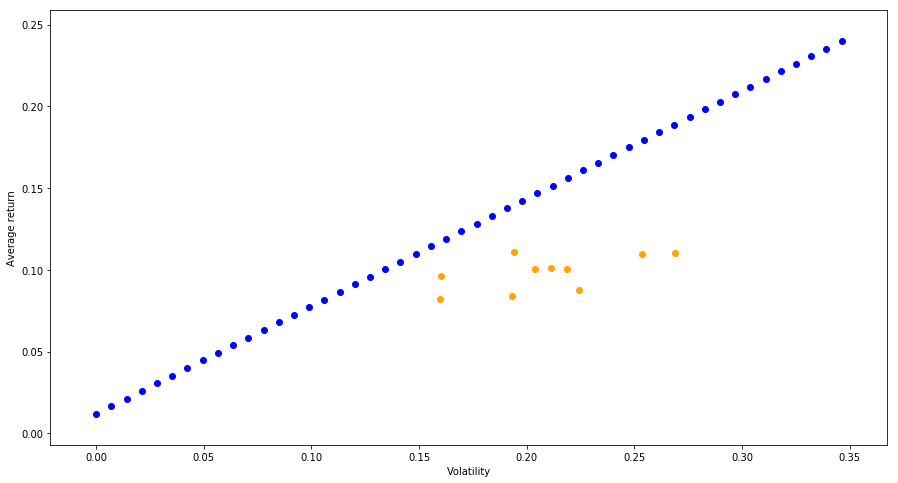

In [4]:
rf = 0.012/12
return_targets = np.linspace(rf, 0.24/12, 50)

mean_std_1 = []
for i in return_targets:
    mean_std_1.append([12**.5*(i-rf)/(PortR["Tangency"].mean()/PortR["Tangency"].std()),12*i])
mean_std_1 = np.array(mean_std_1)

# b) Plot the mean-standard deviation efficient frontier of these 10 industries.
plt.figure(figsize=(15,8))
plt.scatter(mean_std_1[:,0], mean_std_1[:,1], color = "blue")
plt.scatter(12**.5*RiskPre_std, 12*(RiskPre_mean + rf), color = "orange")
plt.xlabel("Volatility")
plt.ylabel("Average return")
plt.show()

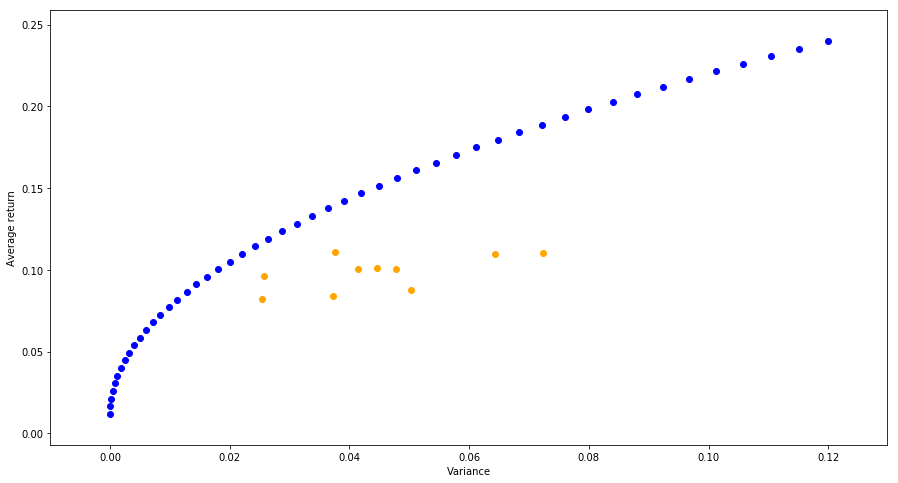

In [5]:
# c) Plot the mean-variance efficient frontier of these 10 industries. 
plt.figure(figsize=(15,8))
plt.scatter(mean_std_1[:,0]**2,mean_std_1[:,1], color = "blue")
plt.scatter(12*RiskPre_std**2, 12*(RiskPre_mean + rf), color = "orange")
plt.xlabel("Variance")
plt.ylabel("Average return")
plt.show()

### 3.

* Repeat question 2, but now for the case that you cannot borrow or invest in the risk-free asset-- for this case you will need to use the maximizer that we use in notebook 5.

In [6]:
from scipy.optimize import minimize

def variance(W):
    return W.T @ RiskPre_cov @ W

constraint_mv = ({'type': 'eq', 'fun': lambda W : W.sum() - 1})

res = minimize(variance, PortW["EW"], constraints = constraint_mv)

mean_std_2 = []
for i in return_targets:
    constraint_list = ({'type':'eq','fun': lambda W: W.T @ RiskPre_mean.values + rf - i},
                       {'type':'eq','fun': lambda W: W.sum()-1})
    res1 = minimize(variance, PortW["EW"], constraints = constraint_list)
    std = 12**0.5*(res1.fun**0.5)
    mean = 12*(res1.x @ RiskPre_mean.values + rf)
    mean_std_2.append([std, mean])
    
mean_std_2 = np.array(mean_std_2)

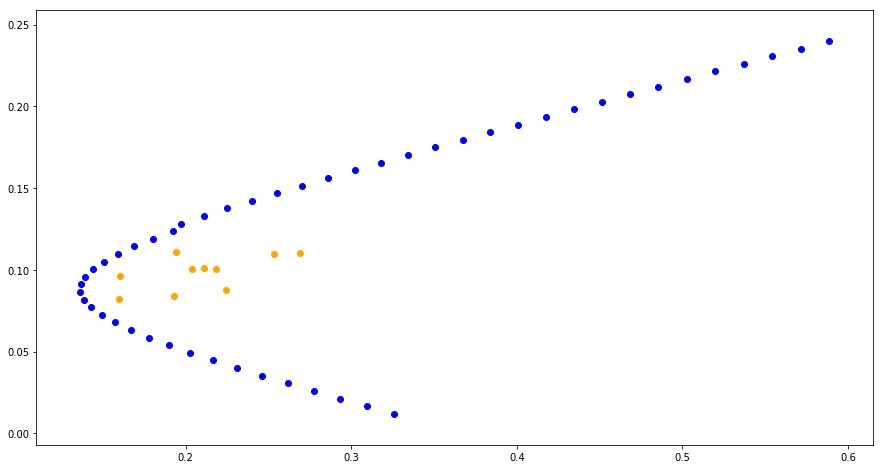

In [7]:
# Plot the mean-standard deviation efficient frontier of these 10 industries without borrowing and investing.

plt.figure(figsize = (15, 8))
plt.scatter(mean_std_2[:, 0], mean_std_2[:, 1], color = "blue")
plt.scatter(12**0.5*RiskPre_std, 12*(RiskPre_mean + rf), color = "orange")
plt.show()

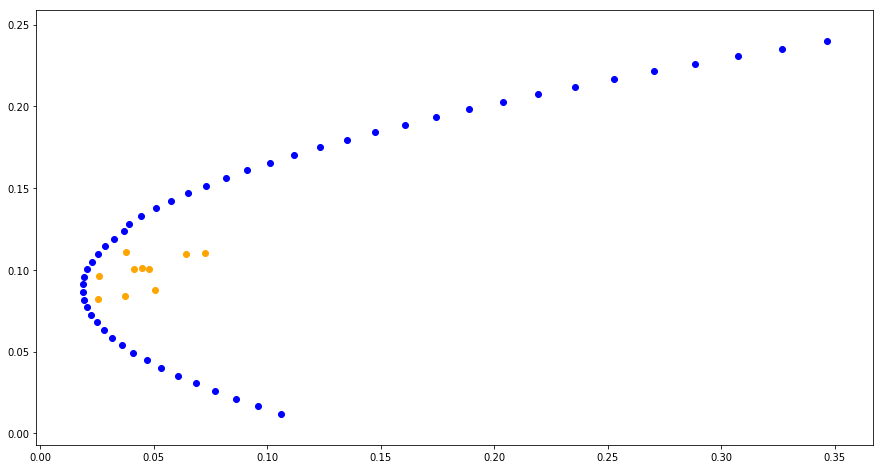

In [8]:
# Plot the mean-variance efficient frontier of these 10 industries without borrowing and investing.
plt.figure(figsize = (15, 8))
plt.scatter(mean_std_2[:, 0]**2, mean_std_2[:, 1], color = "blue")
plt.scatter(12*RiskPre_std**2, 12*(RiskPre_mean + rf), color = "orange")
plt.show()

### 4. 

a)Comment on the reliability of the mean return estimates for each industry.

b)Describe how you would evaluate if they are well estimated.

c)Construct the 95% confidence interval for the estimator of each industry expected return.


d)Artificially change the mean return estimates of each industry by a one standard error increase.  How much does the Tangent portfolio change?  Does the efficient frontier change a lot or a little? What does that teach us?
 
- Do that for the case that you have free borrowing and lending like we did in the beggining of notebook 4, where we can simply scale up and down the tangency portfolio weights, and also for the case that you cannot borrow or invest in the risk-free asset-- for this case you will need to use the maximizer that we use in the end of notebook 4.



a) Comment on the reliability of the mean return estimates for each industry.

The mean return estimates for each industry is not very reliable.

b) Describe how you would evaluate if they are well estimated.

If they are well estimated, we can conduct a two-tail test and test whether the mean estimator is within the confidence interval.

In [9]:
# c) Construct the 95% confidence interval for the estimator of each industry expected return.
Con_int = pd.DataFrame({"Mean": RiskPre_mean,
                        "Std": RiskPre_std}, index = RiskPre_cov.columns)
Con_int["Lower"] = Con_int["Mean"] - 1.96*(Con_int["Std"]/(len(df_no_rf)**0.5))
Con_int["Upper"] = Con_int["Mean"] + 1.96*(Con_int["Std"]/(len(df_no_rf)**0.5))
Con_int

,Mean,Std,Lower,Upper
NoDur,0.007037,0.046262,0.004264,0.009811
Durbl,0.008169,0.077643,0.003515,0.012824
Manuf,0.007394,0.063080,0.003613,0.011176
Enrgy,0.007422,0.060973,0.003767,0.011077
HiTec,0.008128,0.073199,0.003740,0.012516
Telcm,0.005871,0.046081,0.003109,0.008634
Shops,0.007375,0.058788,0.003851,0.010900
Hlth,0.008246,0.056036,0.004887,0.011605
Utils,0.006017,0.055725,0.002676,0.009357
Other,0.006294,0.064767,0.002411,0.010176


In [10]:
# d) Artificially change the mean return estimates of each industry by a one standard error increase. 
RiskPre_mean_adj = RiskPre_mean + RiskPre_std/(len(RiskPre)**0.5)
Tangency_adj = np.linalg.inv(RiskPre_cov) @ RiskPre_mean_adj.values
w_t_adj = Tangency_adj/Tangency_adj.sum()
mean_t_adj, std_t_adj = RiskPre_mean_adj @ w_t_adj, (w_t_adj.T @ RiskPre_cov @ w_t_adj)**0.5
# How much does the Tangent portfolio change? 
w_t_adj

array([ 7.11203180e-01,  1.15519455e-01, -2.46704126e-01,  3.19602209e-01,
        3.53790271e-02,  3.32790799e-01, -2.55396568e-02,  3.13025717e-01,
       -2.80432639e-04, -5.54996171e-01])

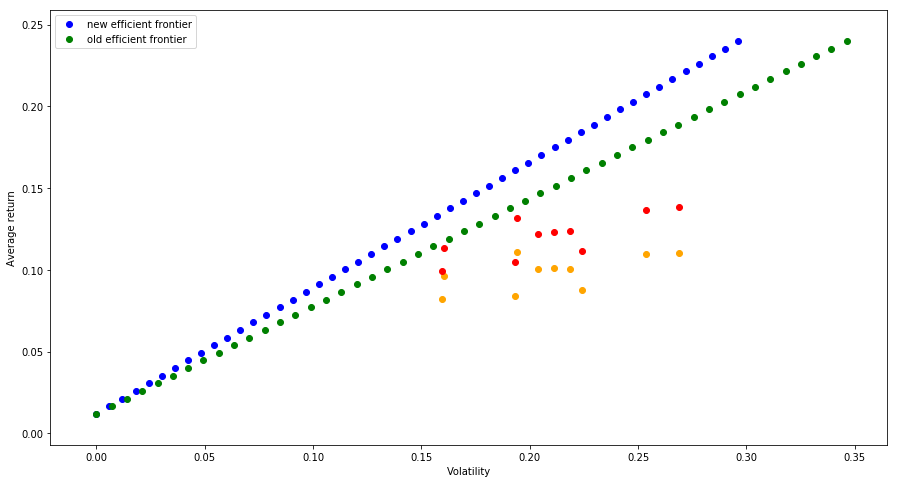

In [11]:
# Plot the mean-variance efficient frontier of these 10 industries with borrowing and investing.
mean_std_3 = []
for i in return_targets:
    mean_std_3.append([12**.5*(i-rf)/(mean_t_adj/std_t_adj),12*i])
mean_std_3 = np.array(mean_std_3)

plt.figure(figsize=(15,8))
plt.scatter(mean_std_3[:,0], mean_std_3[:,1], color = "blue", label = "new efficient frontier")
plt.scatter(mean_std_1[:,0],mean_std_1[:,1], color = "green", label = "old efficient frontier")
plt.scatter(12**0.5*RiskPre_std, 12*(RiskPre_mean + rf), color = "orange")
plt.scatter(12**0.5*RiskPre_std, 12*(RiskPre_mean_adj + rf), color = "red")
plt.legend(loc = 'best')
plt.xlabel("Volatility")
plt.ylabel("Average return")
plt.show()

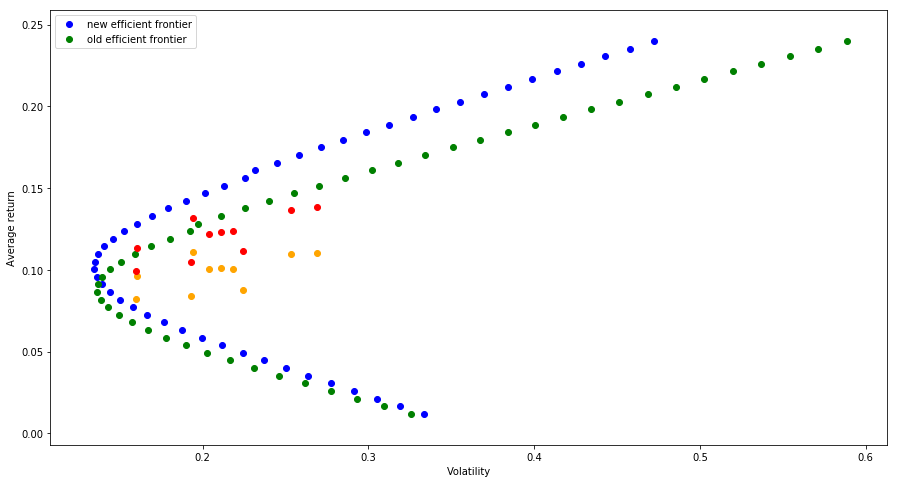

In [12]:
# Plot the mean-variance efficient frontier of these 10 industries without borrowing and investing.
mean_std_4 = []
for i in return_targets:
    constraint_list = ({'type':'eq','fun': lambda W: W.T @ RiskPre_mean_adj.values + rf - i},
                       {'type':'eq','fun': lambda W: W.sum()-1})
    res1 = minimize(variance, PortW["EW"], constraints = constraint_list)
    std = 12**0.5*(res1.fun**0.5)
    mean = 12*(res1.x @ RiskPre_mean_adj.values + rf)
    mean_std_4.append([std, mean])
    
mean_std_4 = np.array(mean_std_4)

plt.figure(figsize = (15, 8))
plt.scatter(mean_std_4[:, 0], mean_std_4[:, 1], color = "blue", label = "new efficient frontier")
plt.scatter(mean_std_2[:, 0], mean_std_2[:, 1], color = "green", label = "old efficient frontier")
plt.scatter(12**0.5*RiskPre_std, 12*(RiskPre_mean + rf), color = "orange")
plt.scatter(12**0.5*RiskPre_std, 12*(RiskPre_mean_adj + rf), color = "red")
plt.legend(loc = 'best')
plt.xlabel("Volatility")
plt.ylabel("Average return")
plt.show()

Efficient frontiers are different because the weight of each asset is changed.

### 5. 

a) Comment on the reliability of the covariance matrix estimate.  

b) First,lets ignore covaraince terms:  assume that all covariances are zero and recompute the efficient frontier using the diagonal matrix of variances as the covariance matrix. (you might find the fucntion diag() from the numpy package very useful here). For this one you can focus on the case with free borrowing and lending. Report the tangency portfolio weights.

c)Then, lets also ignore variance terms: assume very simply that the covariance matrix is just the identity matrix (i.e., a matrix of ones along the diagonal and zeros everywhere else). Compute tangency portfolio weights

d) Now lets assume that the average returns are the same, replicated the analysis in (c), look at the weights, what portfolio is this? 

e) Does the mean-variance frontier change a lot or a little, relative to the analysis in 3)?  

f) Discuss how important are the covariance terms relative to the variance terms.



In [13]:
# b) Ignore covaraince terms.
RiskPre_cov_dig = np.diag(np.diag(RiskPre_cov))
RP = np.linalg.inv(RiskPre_cov_dig) @ RiskPre_mean.values
RP/RP.sum()

array([0.15674364, 0.06459645, 0.08858328, 0.09516233, 0.07231374,
       0.13180202, 0.10172998, 0.12518133, 0.09236373, 0.0715235 ])

In [14]:
# c) Lets also ignore variance terms.
RiskPre_cov_ide = np.diag(np.diag(RiskPre_cov))/np.diag(RiskPre_cov)
Tangency_ide = np.linalg.inv(RiskPre_cov_ide) @ RiskPre_mean.values
w_t_ide = Tangency_ide/Tangency_ide.sum()
w_t_ide

array([0.09780393, 0.11353212, 0.10276628, 0.1031459 , 0.11296529,
       0.08159731, 0.10250107, 0.11459818, 0.08361891, 0.08747101])

In [15]:
# d) Now lets assume that the average returns are the same.
EW = np.linalg.inv(RiskPre_cov_ide) @ np.ones(10)*0.05
EW/EW.sum()

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

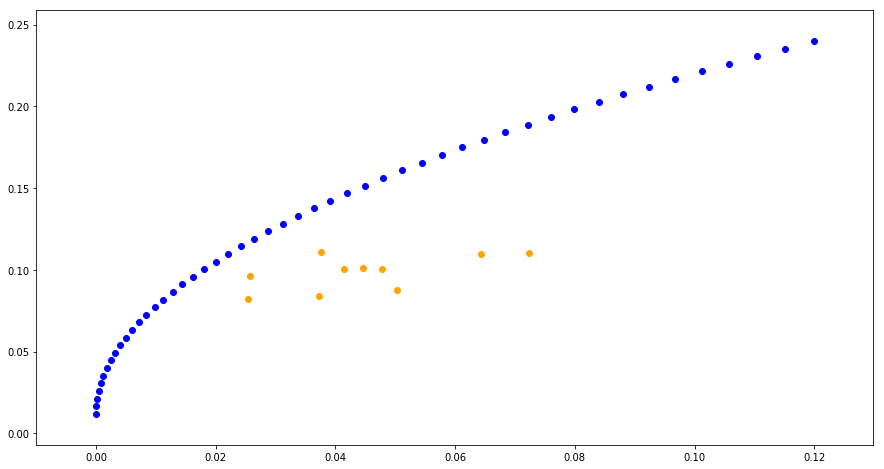

In [16]:
# e) Does the mean-variance frontier change a lot or a little, relative to the analysis in 3)?
rf = 0.012/12

slope = (RiskPre @ PortW["Tangency"]).std() / (RiskPre @ PortW["Tangency"]).mean()

mean_std_3=[]
for i in return_targets:
    mean_std_3.append([i,(i - rf) * slope])
    
plt.figure(figsize=(15,8))
plt.scatter(12*np.array(mean_std_3)[:,1]**2,12*np.array(mean_std_3)[:,0], color = "blue")
plt.scatter(12*RiskPre_std**2, 12*(RiskPre_mean + rf), color = "orange")
plt.show()

f) Discuss how important are the covariance terms relative to the variance terms.

The higher the covariance is, the more important it will be relative to the variance terms.

### 6. 

a) construct the portfolios returns for the 4 different approaches discussed in 4 and 5:tangent portfolio, minimum variance portfolio, minimum variance portfolio that ignores covariance terms, minimum variance portfolio that ignore covariance terms and assume variances are the same.


b) report mean returns for 4 portfolios

c) report mean returns in excess of the risk-free rate

d) Report standard deviations

e) report portfolio sharpe ratios by dividing the answer in (c) by the answer in (d)

As always always annualize your results!!!!

f) Discuss the results. Is it surprising what you find? What does that teach us about the different approaches? What are the cons/pros of each approach?

g) Suggest an empirical approach to learn even more about which strategy is better (no need to implement just discuss) 

In [17]:
# a) Construct the portfolios returns for the 4 different approaches.
PortR_1 = pd.DataFrame({"Tangency": df_no_rf @ PortW["Tangency"],
                      "MinVar": df_no_rf @ PortW["MinVar"],
                      "RP": df_no_rf @ PortW["RP"],
                      "EW": df_no_rf @ PortW["EW"]},
                       index = df_no_rf.index)
PortR_1.head()

,Tangency,MinVar,RP,EW
Date,,,,
1926-07,0.006018,-0.006479,0.028915,0.03532
1926-08,0.035958,0.029093,0.025345,0.02499
1926-09,0.008577,0.011582,0.008751,0.00896
1926-10,0.004046,0.011471,-0.022185,-0.02691
1926-11,0.041138,0.034917,0.035501,0.03314


In [18]:
# b) Report mean returns for 4 portfolios
PortR_1.mean()*12

Tangency    0.126211
MinVar      0.111543
RP          0.119550
EW          0.120190
dtype: float64

In [19]:
# c) Report mean returns in excess of the risk-free rate
PortR.mean()*12

Tangency    0.092367
MinVar      0.077699
RP          0.085705
EW          0.086345
dtype: float64

In [20]:
# d) Report standard deviations
PortR.std()*12**0.5

Tangency    0.140307
MinVar      0.128685
RP          0.172875
EW          0.181012
dtype: float64

In [21]:
# e) Report portfolio sharpe ratios
(PortR.mean()*12) / (PortR.std()*12**0.5)

Tangency    0.658317
MinVar      0.603789
RP          0.495765
EW          0.477014
dtype: float64

f) Discuss the results. Is it surprising what you find? What does that teach us about the different approaches? What are the cons/pros of each approach?

By theory, the MVE has the highest Sharpe Raio. These differet approaches teach us that we cannot achieve the highest return and the lowest variance at the same time, which means that it's necessary to have a balance between risk and return.

The pros of MVE portfolio is that it can achieve thet highest return on each unit of risk. The pros of MVP is that it can reach the portfolio with the lowest variance, while the cons of MVP is that it's Sharpe Ratio cannot be maximized.


g) Suggest an empirical approach to learn even more about which strategy is better (no need to implement just discuss)

We tend to use Sharpe Ratio to evaluate whether a portfolio is good or not. The higher a portfolio's Sharpe Ratio is, the better it is. Therefore, in this case, the MVE portfolio is the best among the four.

### 7.

a) Using the first half of the data construct the tangency portfolio

b) compute the return of the tangency portfolio (which weights you computed in a)in the second half of the sample

c) repeat this for the other three approaches

d) report average returns, standard deviation, and SR for both in sample and out of sample

e) discuss the results



In [22]:
# a)&c) Using the first half of the data construct the four portfolios.
RiskPre_cov_1h = RiskPre.iloc[:round(len(RiskPre)/2)+1,:].cov()
RiskPre_mean_1h = RiskPre.iloc[:round(len(RiskPre)/2)+1,:].mean()
RiskPre_cov_dig_1h = np.diag(np.diag(RiskPre_cov_1h))
RiskPre_cov_ide_1h = np.diag(np.diag(RiskPre_cov_1h))/np.diag(RiskPre_cov_1h)

Tangency_1h = np.linalg.inv(RiskPre_cov_1h) @ RiskPre_mean_1h.values
MinVar_1h = np.linalg.inv(RiskPre_cov_1h) @ (RiskPre_mean_1h.values*0 + RiskPre_mean_1h.mean())
MinVar_dig_1h = np.linalg.inv(RiskPre_cov_dig_1h) @ (RiskPre_mean_1h.values*0 + RiskPre_mean_1h.mean())
MinVar_ide_1h = np.linalg.inv(RiskPre_cov_ide_1h) @ (RiskPre_mean_1h.values*0 + RiskPre_mean_1h.mean())

PortW_1h = pd.DataFrame({"Tangency": np.array(Tangency_1h/Tangency_1h.sum()),
                         "MinVar": np.array(MinVar_1h/MinVar_1h.sum()),
                         "RP": np.array(MinVar_dig_1h/MinVar_dig_1h.sum()),
                         "EW": np.array(MinVar_ide_1h/MinVar_ide_1h.sum())}, 
                         index = RiskPre_cov_1h.columns)
PortW_1h

,Tangency,MinVar,RP,EW
NoDur,0.545476,1.065893,0.165595,0.1
Durbl,0.285060,-0.089102,0.050834,0.1
Manuf,-0.575249,-0.133839,0.073333,0.1
Enrgy,0.329079,0.189021,0.091848,0.1
HiTec,0.307429,-0.212825,0.063503,0.1
Telcm,0.563312,0.690527,0.197977,0.1
Shops,-0.161529,-0.162357,0.096228,0.1
Hlth,0.478540,0.012866,0.102781,0.1
Utils,-0.226187,-0.074093,0.086953,0.1
Other,-0.545931,-0.286090,0.070949,0.1


In [23]:
# b)&c) compute the return of the four portfolios in the second half of the sample.
PortR_2h = pd.DataFrame({"Tangency": RiskPre.iloc[round(len(RiskPre)/2)+1:,:] @ PortW_1h["Tangency"],
                         "MinVar": RiskPre.iloc[round(len(RiskPre)/2)+1:,:] @ PortW_1h["MinVar"],
                         "RP": RiskPre.iloc[round(len(RiskPre)/2)+1:,:] @ PortW_1h["RP"],
                         "EW": RiskPre.iloc[round(len(RiskPre)/2)+1:,:] @ PortW_1h["EW"]},
                          index = RiskPre.iloc[round(len(RiskPre)/2)+1:,:].index)
PortR_2h.tail()

,Tangency,MinVar,RP,EW
Date,,,,
2015-03,-0.023554,-0.036249,-0.013330,-0.01167
2015-04,0.044685,0.044240,0.011226,0.00807
2015-05,0.012890,0.000076,0.008444,0.00809
2015-06,-0.011230,-0.007313,-0.016335,-0.01866
2015-07,0.010850,0.028670,0.013482,0.00841


In [24]:
# d) Report average returns, standard deviation, and SR for both in sample and out of sample.
PortR_1h = pd.DataFrame({"Tangency": RiskPre.iloc[:round(len(RiskPre)/2)+1,:] @ PortW_1h["Tangency"],
                           "MinVar": RiskPre.iloc[:round(len(RiskPre)/2)+1,:] @ PortW_1h["MinVar"],
                           "RP": RiskPre.iloc[:round(len(RiskPre)/2)+1,:] @ PortW_1h["RP"],
                           "EW": RiskPre.iloc[:round(len(RiskPre)/2)+1,:] @ PortW_1h["EW"]},
                          index = RiskPre.iloc[:round(len(RiskPre)/2)+1,:].index)

In [25]:
Mean_Std_SR_in = pd.DataFrame({"Mean": PortR_1h.mean()*12,
                               "Std": PortR_1h.std()*12**0.5,
                               "SR": (PortR_1h.mean()*12)/(PortR_1h.std()*12**0.5)}, 
                              index = ["Tangency", "MinVar", "RP", "EW"])
print("Mean, std, and SR for in sample:")
display_html(Mean_Std_SR_in)
Mean_Std_SR_out = pd.DataFrame({"Mean": PortR_2h.mean()*12,
                                "Std": PortR_2h.std()*12**0.5,
                                "SR": (PortR_2h.mean()*12)/(PortR_2h.std()*12**0.5)}, 
                               index = ["Tangency", "MinVar", "RP", "EW"])
print("Mean, std, and SR for out of sample:")
display_html(Mean_Std_SR_out)

Mean, std, and SR for in sample:


,Mean,Std,SR
Tangency,0.108648,0.161223,0.673900
MinVar,0.056997,0.116773,0.488102
RP,0.094387,0.191357,0.493251
EW,0.100615,0.209056,0.481284


Mean, std, and SR for out of sample:


,Mean,Std,SR
Tangency,0.086212,0.162794,0.529578
MinVar,0.091188,0.148566,0.613786
RP,0.073835,0.141464,0.521937
EW,0.072048,0.147760,0.487604


e) Discuss the results

The sample size is not large enough so there is some difference.


### 8.

a) Lets now do an out-of-sample test on a rolling basis. Estimate the tangency portfolio using the first 120 months of data, compute the realized return in month 121.

b) Then compute the tangency portfolio using data from month to 121, compute the realized return for month 122. Do that on a rolling basis for the entire sample.

c) repeat this for the other three approaches

d) report average retursn, standard deviations, and sharpe ratios

e) discuss

TIP: You want to use a for loop

In [26]:
# a),b)&c)
PortR_next = []
for n in range(120, len(RiskPre)):
    RiskPre_cov_loop = RiskPre[:n].cov()
    RiskPre_mean_loop = RiskPre[:n].mean()
    RiskPre_cov_dig_loop = np.diag(np.diag(RiskPre_cov_loop))
    RiskPre_cov_ide_loop = np.diag(np.diag(RiskPre_cov_loop))/np.diag(RiskPre_cov_loop)

    Tangency_loop = np.linalg.inv(RiskPre_cov_loop) @ RiskPre_mean_loop
    MinVar_loop = np.linalg.inv(RiskPre_cov_loop) @ (RiskPre_mean_loop*0 + RiskPre_mean_loop.mean())
    MinVar_dig_loop = np.linalg.inv(RiskPre_cov_dig_loop) @ (RiskPre_mean_loop*0 + RiskPre_mean_loop.mean())
    MinVar_ide_loop = np.linalg.inv(RiskPre_cov_ide_loop) @ (RiskPre_mean_loop*0 + RiskPre_mean_loop.mean())

    W_Tangency = np.array(Tangency_loop/Tangency_loop.sum())
    W_MinVar = np.array(MinVar_loop/MinVar_loop.sum())
    W_RP = np.array(MinVar_dig_loop/MinVar_dig_loop.sum())
    W_EW = np.array(MinVar_ide_loop/MinVar_ide_loop.sum())
    
    PortR_next.append([RiskPre.iloc[n,:] @ W_Tangency, RiskPre.iloc[n,:] @ W_MinVar,
                       RiskPre.iloc[n,:] @ W_RP, RiskPre.iloc[n,:] @ W_EW])

In [27]:
# b) Compute the realized return on a rolling basis
PortR_next_df = pd.DataFrame(data = np.array(PortR_next), index = RiskPre.iloc[120:,:].index)
PortR_next_df.rename(columns = {0: 'Tangency', 1: 'MinVar', 2: 'RP', 3: 'EW'}, inplace = True)
display(PortR_next_df.head())

# d) Report average retursn, standard deviations, and sharpe ratios.
print("Mean, std, and SR:")
Mean_Std_SR_loop = pd.DataFrame({"Mean": PortR_next_df.mean()*12,
                                "Std": PortR_next_df.std()*12**0.5,
                                "SR": PortR_next_df.mean()/PortR_next_df.std()}, index = Mean_Std_SR_out.index)
display(Mean_Std_SR_loop)

,Tangency,MinVar,RP,EW
Date,,,,
1936-07,-0.072121,-0.041310,0.055652,0.06680
1936-08,-0.002637,0.005132,0.007838,0.00732
1936-09,-0.043353,-0.013124,0.005634,0.00759
1936-10,-0.124820,0.019603,0.064274,0.06813
1936-11,0.018801,0.038917,0.035829,0.03138


Mean, std, and SR:


,Mean,Std,SR
Tangency,0.061405,0.159077,0.111432
MinVar,0.072159,0.129880,0.160382
RP,0.082157,0.140038,0.169360
EW,0.083794,0.149126,0.162207


e) Discuss

Under rolling basis, the performance of MVE portfolio is not the best.